In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from operator import itemgetter
import xgboost as xgb
import random
import time
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from numpy import genfromtxt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc,recall_score,precision_score
import datetime as dt

In [ ]:
df = pd.read_csv('/content/echocardiogram.csv')


In [ ]:
df

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,alive-at-1
0,11.00,0,71.0,0,0.260,9.000,4.600,14.00,1.00,0
1,19.00,0,72.0,0,0.380,6.000,4.100,14.00,1.70,0
2,16.00,0,55.0,0,0.260,4.000,3.420,14.00,1.00,0
3,57.00,0,60.0,0,0.253,12.062,4.603,16.00,1.45,0
4,19.00,1,57.0,0,0.160,22.000,5.750,18.00,2.25,0
...,...,...,...,...,...,...,...,...,...,...
69,1.25,1,63.0,0,0.300,6.900,3.520,18.16,1.51,1
70,24.00,0,59.0,0,0.170,14.300,5.490,13.50,1.50,0
71,25.00,0,57.0,0,0.228,9.700,4.290,11.00,1.00,0
72,0.75,1,78.0,0,0.230,40.000,6.230,14.00,1.40,1


In [ ]:
df = pd.DataFrame(df)

In [ ]:
print(df.dtypes)

survival                 float64
still-alive                int64
age-at-heart-attack      float64
pericardial-effusion       int64
fractional-shortening    float64
epss                     float64
lvdd                     float64
wall-motion-score        float64
wall-motion-index        float64
alive-at-1                 int64
dtype: object


In [ ]:
print(df.dtypes)

survival                 float64
still-alive                int64
age-at-heart-attack      float64
pericardial-effusion       int64
fractional-shortening    float64
epss                     float64
lvdd                     float64
wall-motion-score        float64
wall-motion-index        float64
alive-at-1                 int64
dtype: object


In [ ]:
df["survival"].values

array([1.10e+01, 1.90e+01, 1.60e+01, 5.70e+01, 1.90e+01, 2.60e+01,
       1.30e+01, 5.00e+01, 1.90e+01, 2.50e+01, 1.00e+01, 5.20e+01,
       5.20e+01, 4.40e+01, 5.00e-01, 2.40e+01, 5.00e-01, 5.00e-01,
       2.20e+01, 1.00e+00, 7.50e-01, 7.50e-01, 5.00e-01, 5.00e+00,
       3.60e+01, 3.50e+01, 2.60e+01, 1.60e+01, 1.00e+00, 1.90e+01,
       3.20e+01, 1.60e+01, 4.00e+01, 4.60e+01, 1.95e+01, 2.00e+01,
       2.50e-01, 2.00e+00, 7.00e+00, 1.20e+01, 1.00e+00, 1.00e+01,
       4.50e+01, 2.20e+01, 5.30e+01, 2.60e+01, 2.60e+01, 4.90e+01,
       4.90e+01, 4.70e+01, 4.10e+01, 2.50e-01, 3.30e+01, 2.90e+01,
       4.10e+01, 1.50e+01, 3.00e-02, 1.20e+01, 2.70e+01, 7.50e-01,
       7.50e-01, 5.50e+01, 5.30e+01,      nan, 4.00e+01, 5.00e+00,
       4.00e+00, 3.30e+01, 2.20e+01, 1.25e+00, 2.40e+01, 2.50e+01,
       7.50e-01, 3.00e+00])

In [ ]:
df["still-alive"].values

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1])

In [ ]:
df['age-at-heart-attack'].values

array([71.   , 72.   , 55.   , 60.   , 57.   , 68.   , 62.   , 60.   ,
       46.   , 54.   , 77.   , 62.   , 73.   , 60.   , 62.   , 55.   ,
       69.   , 62.529, 66.   , 66.   , 69.   , 85.   , 73.   , 71.   ,
       55.   , 63.   , 61.   , 63.   , 65.   , 68.   , 54.   , 70.   ,
       79.   , 56.   , 81.   , 59.   , 63.   , 56.   , 61.   , 58.   ,
       60.   , 66.   , 63.   , 57.   , 70.   , 79.   , 72.   , 51.   ,
       70.   , 65.   , 78.   , 86.   , 56.   , 60.   , 59.   , 54.   ,
          nan, 64.   , 54.   , 78.   , 61.   , 55.   , 59.   , 61.   ,
       74.   , 65.   , 58.   , 66.   , 70.   , 63.   , 59.   , 57.   ,
       78.   , 62.   ])

In [ ]:
df['survival'].values

array([1.10e+01, 1.90e+01, 1.60e+01, 5.70e+01, 1.90e+01, 2.60e+01,
       1.30e+01, 5.00e+01, 1.90e+01, 2.50e+01, 1.00e+01, 5.20e+01,
       5.20e+01, 4.40e+01, 5.00e-01, 2.40e+01, 5.00e-01, 5.00e-01,
       2.20e+01, 1.00e+00, 7.50e-01, 7.50e-01, 5.00e-01, 5.00e+00,
       3.60e+01, 3.50e+01, 2.60e+01, 1.60e+01, 1.00e+00, 1.90e+01,
       3.20e+01, 1.60e+01, 4.00e+01, 4.60e+01, 1.95e+01, 2.00e+01,
       2.50e-01, 2.00e+00, 7.00e+00, 1.20e+01, 1.00e+00, 1.00e+01,
       4.50e+01, 2.20e+01, 5.30e+01, 2.60e+01, 2.60e+01, 4.90e+01,
       4.90e+01, 4.70e+01, 4.10e+01, 2.50e-01, 3.30e+01, 2.90e+01,
       4.10e+01, 1.50e+01, 3.00e-02, 1.20e+01, 2.70e+01, 7.50e-01,
       7.50e-01, 5.50e+01, 5.30e+01,      nan, 4.00e+01, 5.00e+00,
       4.00e+00, 3.30e+01, 2.20e+01, 1.25e+00, 2.40e+01, 2.50e+01,
       7.50e-01, 3.00e+00])

In [ ]:
mean_values=df[['survival','still-alive']].mean()
print(mean_values)

survival       21.781233
still-alive     0.391892
dtype: float64


In [ ]:
df["survival"].fillna(value=df["survival"].mean(), inplace=True)

In [ ]:
df['survival'].values

array([1.10000000e+01, 1.90000000e+01, 1.60000000e+01, 5.70000000e+01,
       1.90000000e+01, 2.60000000e+01, 1.30000000e+01, 5.00000000e+01,
       1.90000000e+01, 2.50000000e+01, 1.00000000e+01, 5.20000000e+01,
       5.20000000e+01, 4.40000000e+01, 5.00000000e-01, 2.40000000e+01,
       5.00000000e-01, 5.00000000e-01, 2.20000000e+01, 1.00000000e+00,
       7.50000000e-01, 7.50000000e-01, 5.00000000e-01, 5.00000000e+00,
       3.60000000e+01, 3.50000000e+01, 2.60000000e+01, 1.60000000e+01,
       1.00000000e+00, 1.90000000e+01, 3.20000000e+01, 1.60000000e+01,
       4.00000000e+01, 4.60000000e+01, 1.95000000e+01, 2.00000000e+01,
       2.50000000e-01, 2.00000000e+00, 7.00000000e+00, 1.20000000e+01,
       1.00000000e+00, 1.00000000e+01, 4.50000000e+01, 2.20000000e+01,
       5.30000000e+01, 2.60000000e+01, 2.60000000e+01, 4.90000000e+01,
       4.90000000e+01, 4.70000000e+01, 4.10000000e+01, 2.50000000e-01,
       3.30000000e+01, 2.90000000e+01, 4.10000000e+01, 1.50000000e+01,
      

In [ ]:
df["survival"].fillna(value=df["survival"].mean(), inplace=True)

In [ ]:
df['survival'].values

array([1.10000000e+01, 1.90000000e+01, 1.60000000e+01, 5.70000000e+01,
       1.90000000e+01, 2.60000000e+01, 1.30000000e+01, 5.00000000e+01,
       1.90000000e+01, 2.50000000e+01, 1.00000000e+01, 5.20000000e+01,
       5.20000000e+01, 4.40000000e+01, 5.00000000e-01, 2.40000000e+01,
       5.00000000e-01, 5.00000000e-01, 2.20000000e+01, 1.00000000e+00,
       7.50000000e-01, 7.50000000e-01, 5.00000000e-01, 5.00000000e+00,
       3.60000000e+01, 3.50000000e+01, 2.60000000e+01, 1.60000000e+01,
       1.00000000e+00, 1.90000000e+01, 3.20000000e+01, 1.60000000e+01,
       4.00000000e+01, 4.60000000e+01, 1.95000000e+01, 2.00000000e+01,
       2.50000000e-01, 2.00000000e+00, 7.00000000e+00, 1.20000000e+01,
       1.00000000e+00, 1.00000000e+01, 4.50000000e+01, 2.20000000e+01,
       5.30000000e+01, 2.60000000e+01, 2.60000000e+01, 4.90000000e+01,
       4.90000000e+01, 4.70000000e+01, 4.10000000e+01, 2.50000000e-01,
       3.30000000e+01, 2.90000000e+01, 4.10000000e+01, 1.50000000e+01,
      

In [ ]:
df["age-at-heart-attack"].fillna(value=df["age-at-heart-attack"].mean(), inplace=True)

In [ ]:
df['age-at-heart-attack'].values

array([71.        , 72.        , 55.        , 60.        , 57.        ,
       68.        , 62.        , 60.        , 46.        , 54.        ,
       77.        , 62.        , 73.        , 60.        , 62.        ,
       55.        , 69.        , 62.529     , 66.        , 66.        ,
       69.        , 85.        , 73.        , 71.        , 55.        ,
       63.        , 61.        , 63.        , 65.        , 68.        ,
       54.        , 70.        , 79.        , 56.        , 81.        ,
       59.        , 63.        , 56.        , 61.        , 58.        ,
       60.        , 66.        , 63.        , 57.        , 70.        ,
       79.        , 72.        , 51.        , 70.        , 65.        ,
       78.        , 86.        , 56.        , 60.        , 59.        ,
       54.        , 64.34971233, 64.        , 54.        , 78.        ,
       61.        , 55.        , 59.        , 61.        , 74.        ,
       65.        , 58.        , 66.        , 70.        , 63.  

In [ ]:
df["pericardial-effusion"].fillna(value=df["pericardial-effusion"].mean(), inplace=True)

In [ ]:
df['pericardial-effusion'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
df["fractional-shortening"].fillna(value=df["fractional-shortening"].mean(), inplace=True)

In [ ]:
df['fractional-shortening'].values

array([0.26      , 0.38      , 0.26      , 0.253     , 0.16      ,
       0.26      , 0.23      , 0.33      , 0.34      , 0.14      ,
       0.13      , 0.45      , 0.33      , 0.15      , 0.12      ,
       0.25      , 0.26      , 0.07      , 0.09      , 0.22      ,
       0.15      , 0.18      , 0.23      , 0.17      , 0.21      ,
       0.21905714, 0.61      , 0.21905714, 0.06      , 0.51      ,
       0.35      , 0.27      , 0.15      , 0.33      , 0.12      ,
       0.03      , 0.21905714, 0.04      , 0.27      , 0.3       ,
       0.01      , 0.29      , 0.15      , 0.13      , 0.1       ,
       0.17      , 0.187     , 0.16      , 0.25      , 0.36      ,
       0.06      , 0.225     , 0.25      , 0.12      , 0.29      ,
       0.217     , 0.26      , 0.2       , 0.07      , 0.05      ,
       0.21905714, 0.28      , 0.344     , 0.2       , 0.2       ,
       0.16      , 0.17      , 0.2       , 0.38      , 0.3       ,
       0.17      , 0.228     , 0.23      , 0.26      ])

In [ ]:
df["epss"].fillna(value=df["epss"].mean(), inplace=True)

In [ ]:
df['epss'].values

array([ 9.        ,  6.        ,  4.        , 12.062     , 22.        ,
        5.        , 31.        ,  8.        ,  0.        , 13.        ,
       16.        ,  9.        ,  6.        , 10.        , 23.        ,
       12.063     , 11.        , 20.        , 17.        , 15.        ,
       12.        , 19.        , 12.733     ,  0.        ,  4.2       ,
       10.        , 13.1       , 12.57663636, 23.6       , 12.57663636,
        9.3       ,  4.7       , 17.5       , 12.57663636, 12.57663636,
       21.3       , 12.57663636, 14.        , 12.57663636,  9.4       ,
       24.6       , 15.6       , 13.        , 18.6       ,  9.8       ,
       11.9       , 12.        , 13.2       ,  9.7       ,  8.8       ,
       16.1       , 12.2       , 11.        , 10.2       ,  7.5       ,
       17.9       , 19.4       ,  7.1       , 16.8       , 10.        ,
       12.57663636,  5.5       ,  9.1       ,  9.4       ,  4.8       ,
        8.5       , 28.9       , 12.57663636,  0.        ,  6.9 

In [ ]:
df["lvdd"].fillna(value=df["lvdd"].mean(), inplace=True)

In [ ]:
df['lvdd'].values

array([4.6       , 4.1       , 3.42      , 4.603     , 5.75      ,
       4.31      , 5.43      , 5.25      , 5.09      , 4.49      ,
       4.23      , 3.6       , 4.        , 3.73      , 5.8       ,
       4.29      , 4.65      , 5.2       , 5.819     , 5.4       ,
       5.39      , 5.46      , 6.06      , 4.65      , 4.16      ,
       4.78591176, 4.07      , 5.31      , 4.78591176, 3.88      ,
       3.63      , 4.49      , 4.27      , 3.59      , 4.78591176,
       6.29      , 4.78591176, 5.        , 4.78591176, 3.49      ,
       5.65      , 6.15      , 4.57      , 4.37      , 5.3       ,
       5.15      , 5.02      , 5.26      , 5.57      , 5.78      ,
       5.62      , 5.2       , 4.72      , 4.31      , 4.75      ,
       4.54      , 4.77      , 4.58      , 4.16      , 4.44      ,
       4.78591176, 4.48      , 4.04      , 4.02      , 4.56      ,
       5.47      , 6.73      , 4.23      , 4.55      , 3.52      ,
       5.49      , 4.29      , 6.23      , 4.42      ])

In [ ]:
df["wall-motion-score"].fillna(value=df["wall-motion-score"].mean(), inplace=True)

In [ ]:
df['wall-motion-score'].values

array([14.        , 14.        , 14.        , 16.        , 18.        ,
       12.        , 22.5       , 14.        , 16.        , 15.5       ,
       18.        , 16.        , 14.        , 14.        , 11.67      ,
       14.        , 18.        , 24.        ,  8.        , 27.        ,
       19.5       , 13.83      ,  7.5       ,  8.        , 14.        ,
       14.        , 13.        ,  5.        , 21.5       , 15.        ,
       11.        , 22.        , 13.        , 14.        ,  9.        ,
       17.        , 23.        , 15.34808219,  9.        , 14.        ,
       39.        , 14.        , 13.        , 12.33      , 23.        ,
       10.5       , 13.        , 11.        ,  5.5       , 12.        ,
       13.67      , 24.        , 11.        , 15.        , 13.        ,
       16.5       , 21.        , 14.        , 18.        , 15.        ,
       28.        , 22.        ,  9.        , 15.67      , 12.5       ,
       16.        , 26.08      , 12.        , 10.        , 18.16

In [ ]:
df["wall-motion-index"].fillna(value=df["wall-motion-index"].mean(), inplace=True)

In [ ]:
df['wall-motion-index'].values

array([1.        , 1.7       , 1.        , 1.45      , 2.25      ,
       1.        , 1.875     , 1.        , 1.14      , 1.19      ,
       1.8       , 1.14      , 1.        , 1.        , 2.33      ,
       1.        , 1.64      , 2.        , 1.333     , 2.25      ,
       1.625     , 1.38      , 1.5       , 1.        , 1.56      ,
       1.17      , 1.625     , 1.        , 2.15      , 1.67      ,
       1.222     , 2.        , 1.3       , 1.        , 1.25      ,
       1.31      , 2.3       , 1.43379452, 1.5       , 1.        ,
       3.        , 1.        , 1.08      , 1.37      , 2.3       ,
       1.05      , 1.18      , 1.        , 1.1       , 1.        ,
       1.367     , 2.18      , 1.        , 1.67      , 1.08      ,
       1.18      , 2.1       , 1.        , 1.5       , 1.36      ,
       2.33      , 1.83      , 1.        , 1.42      , 1.04      ,
       1.45      , 2.01      , 1.        , 1.        , 1.51      ,
       1.5       , 1.        , 1.4       , 1.        ])

In [ ]:
df["alive-at-1"].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1])

In [ ]:
df["lvdd"].values

array([4.6       , 4.1       , 3.42      , 4.603     , 5.75      ,
       4.31      , 5.43      , 5.25      , 5.09      , 4.49      ,
       4.23      , 3.6       , 4.        , 3.73      , 5.8       ,
       4.29      , 4.65      , 5.2       , 5.819     , 5.4       ,
       5.39      , 5.46      , 6.06      , 4.65      , 4.16      ,
       4.78591176, 4.07      , 5.31      , 4.78591176, 3.88      ,
       3.63      , 4.49      , 4.27      , 3.59      , 4.78591176,
       6.29      , 4.78591176, 5.        , 4.78591176, 3.49      ,
       5.65      , 6.15      , 4.57      , 4.37      , 5.3       ,
       5.15      , 5.02      , 5.26      , 5.57      , 5.78      ,
       5.62      , 5.2       , 4.72      , 4.31      , 4.75      ,
       4.54      , 4.77      , 4.58      , 4.16      , 4.44      ,
       4.78591176, 4.48      , 4.04      , 4.02      , 4.56      ,
       5.47      , 6.73      , 4.23      , 4.55      , 3.52      ,
       5.49      , 4.29      , 6.23      , 4.42      ])

In [ ]:
df["epss"].values

array([ 9.        ,  6.        ,  4.        , 12.062     , 22.        ,
        5.        , 31.        ,  8.        ,  0.        , 13.        ,
       16.        ,  9.        ,  6.        , 10.        , 23.        ,
       12.063     , 11.        , 20.        , 17.        , 15.        ,
       12.        , 19.        , 12.733     ,  0.        ,  4.2       ,
       10.        , 13.1       , 12.57663636, 23.6       , 12.57663636,
        9.3       ,  4.7       , 17.5       , 12.57663636, 12.57663636,
       21.3       , 12.57663636, 14.        , 12.57663636,  9.4       ,
       24.6       , 15.6       , 13.        , 18.6       ,  9.8       ,
       11.9       , 12.        , 13.2       ,  9.7       ,  8.8       ,
       16.1       , 12.2       , 11.        , 10.2       ,  7.5       ,
       17.9       , 19.4       ,  7.1       , 16.8       , 10.        ,
       12.57663636,  5.5       ,  9.1       ,  9.4       ,  4.8       ,
        8.5       , 28.9       , 12.57663636,  0.        ,  6.9 

In [ ]:
print(df.describe())

        survival  still-alive  age-at-heart-attack  pericardial-effusion  \
count  74.000000    74.000000            74.000000             74.000000   
mean   21.781233     0.391892            64.349712              0.202703   
std    17.672801     0.491505             8.286179              0.404757   
min     0.030000     0.000000            46.000000              0.000000   
25%     4.250000     0.000000            59.000000              0.000000   
50%    19.750000     0.000000            63.000000              0.000000   
75%    34.500000     1.000000            70.000000              0.000000   
max    57.000000     1.000000            86.000000              1.000000   

       fractional-shortening       epss       lvdd  wall-motion-score  \
count              74.000000  74.000000  74.000000          74.000000   
mean                0.219057  12.576636   4.785912          15.348082   
std                 0.108172   6.861067   0.736326           5.559407   
min                 0.0

sytax to check no. of NAN values in dataset

In [ ]:
print(df.isnull().sum().sum())

0


In [ ]:
X = df[['survival','still-alive','age-at-heart-attack','pericardial-effusion','fractional-shortening','epss','lvdd','wall-motion-score' ,'wall-motion-index']]
y = df[["alive-at-1"]]

In [ ]:
X

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index
0,11.00,0,71.0,0,0.260,9.000,4.600,14.00,1.00
1,19.00,0,72.0,0,0.380,6.000,4.100,14.00,1.70
2,16.00,0,55.0,0,0.260,4.000,3.420,14.00,1.00
3,57.00,0,60.0,0,0.253,12.062,4.603,16.00,1.45
4,19.00,1,57.0,0,0.160,22.000,5.750,18.00,2.25
...,...,...,...,...,...,...,...,...,...
69,1.25,1,63.0,0,0.300,6.900,3.520,18.16,1.51
70,24.00,0,59.0,0,0.170,14.300,5.490,13.50,1.50
71,25.00,0,57.0,0,0.228,9.700,4.290,11.00,1.00
72,0.75,1,78.0,0,0.230,40.000,6.230,14.00,1.40


In [ ]:
y

,alive-at-1
0,0
1,0
2,0
3,0
4,0
...,...
69,1
70,0
71,0
72,1


In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 193.6 MB 75 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


 Feature Scaling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

Training Model

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier()

Predicting the test set results

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[15  0]
 [ 1  3]]


# Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy))

Accuracy: 0.9473684210526315
Accuracy: 0.95%


# ROC Curve

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,y_pred)

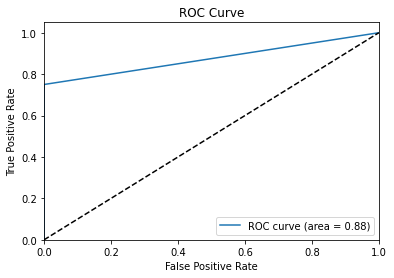

In [ ]:
roc_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Precision & Recall Value

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y_test, y_pred))
print("Recall Value:", recall_score(y_test, y_pred))

Precision: 1.0
Recall Value: 0.75


In [ ]:
from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_test, y_pred))

F1 Score: 0.8571428571428571
